<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/K_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
N=3000

In [ ]:
dims = 2
X =[]
means =[]
k=5


for i in range(k):
  X.append(np.random.randn(N,dims)+np.random.randn(1,dims)*3.4)
  means.append(np.mean(X[-1], axis=0))

X=np.vstack(X)
means=np.vstack(means)

In [ ]:
X

array([[-2.75226774, -3.10186641],
       [-2.79893063, -4.1010496 ],
       [-3.05644149, -3.00965549],
       ...,
       [-2.63410589, -2.95125339],
       [-1.04867042, -3.19147473],
       [-1.14537241, -1.62938462]])

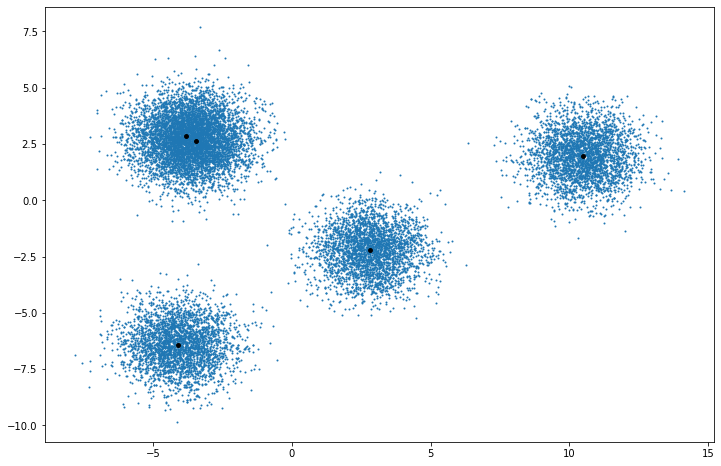

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=15)

In [ ]:
def Distance(x, means, *args, **kwargs):
  diff = []
  dists = []
  for mean in means:
     diff=x-mean
     dist = np.sqrt(np.sum(diff**2, axis=1, keepdims=True))
     dists.append(dist)
  return np.hstack(dists)

In [ ]:
dist = Distance(X, means)

In [ ]:
y_hat = np.argmin(dist, axis=1)

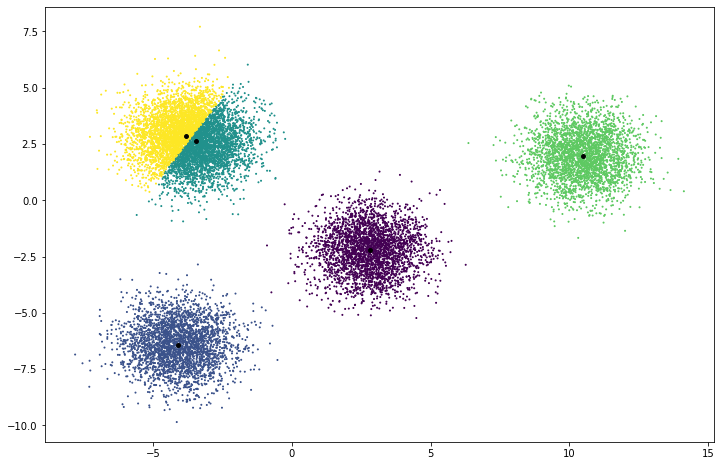

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=15)

In [ ]:
indices = np.arange(X.shape[0])
sample_indices=np.random.choice(indices, size=k, replace=False)
means =X[sample_indices]

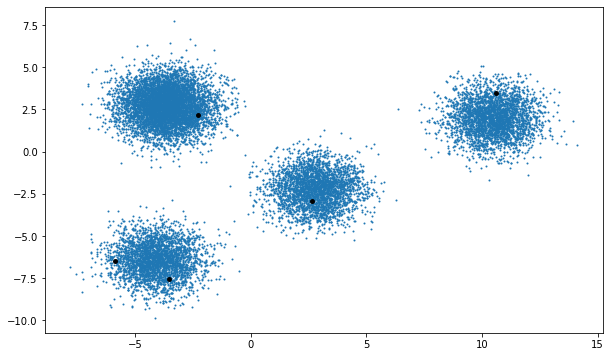

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=15)

In [ ]:
dist = Distance(X, means)
y_hat = np.argmin(dist, axis=1)

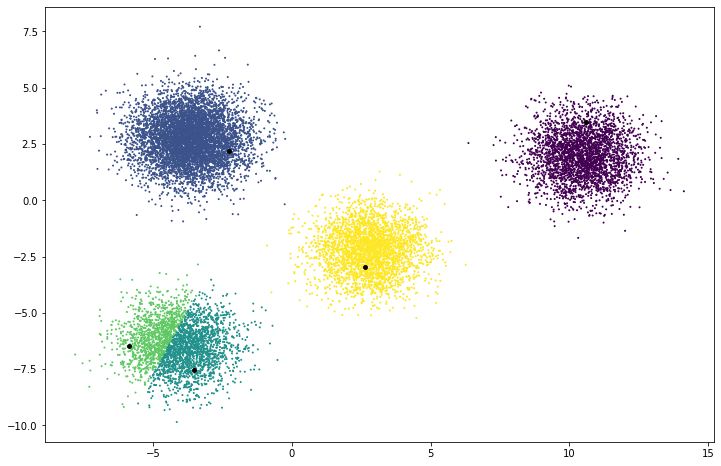

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=15)

In [ ]:
means = []
for i in range(k):
  mean = np.mean(X[y_hat==i],axis=0)
  means.append(mean)
means = np.vstack(means)

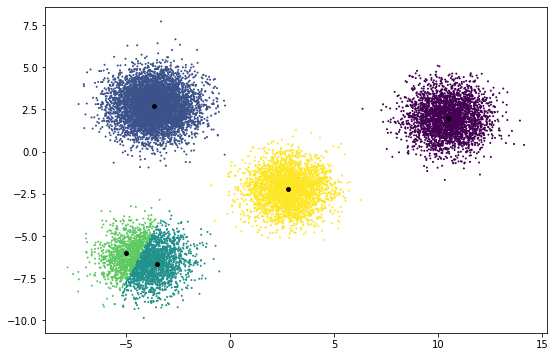

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=15)

In [ ]:
dist = Distance(X, means)
y_hat = np.argmin(dist, axis=1)

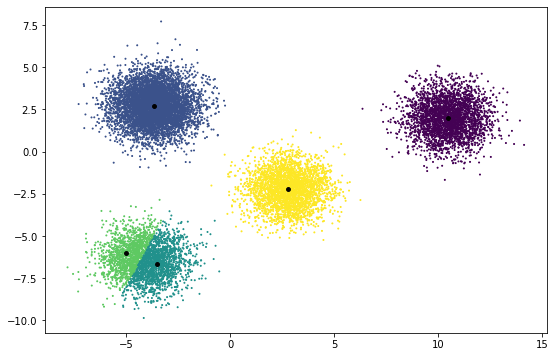

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=15)

In [ ]:
def KMeans(x,k,iterations=3):
  indices= np.arange(x.shape[0])
  sample_indices=np.random.choice(indices,size=k,replace=False)
  means=x[sample_indices]

  for i in range(iterations):
    dist=Distance(x,means)
    y_hat=np.argmin(dist,axis=1)
    means=[]
    for n in range(k):
      mean=np.mean(x[y_hat==n],axis=0)
      means.append(mean)
    means=np.vstack(means)

  dist=Distance(x,means)
  y_hat=np.argmin(dist,axis=1)
  return (y_hat,means)

In [ ]:
y_hat, means = KMeans(X, 5 , iterations=3)

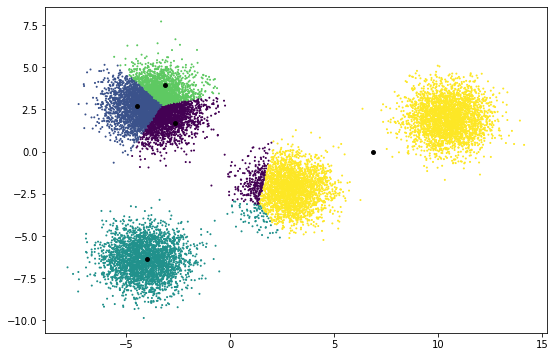

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,0], X[:,1], s=1, c=y_hat)
plt.scatter(means[:,0], means[:,1], c='k', s=15)